In [ ]:
import torch
import torch.nn as  nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
import numpy 

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True" 

In [ ]:
mean_gray = 0.1307 #already known values
std_gray = 0.3081
transforms = transforms.Compose([transforms.ToTensor() ,  transforms.Normalize((mean_gray), (std_gray)) ])
#normalizing the data output will be in form of tensor

In [ ]:
print(2+4)

6


In [ ]:
trainDataset = datasets.MNIST(root="C:\\Users\\harsh\\Z\\BootCamp\\mnistData", train=True, transform=transforms, download=True)
testDataset = datasets.MNIST(root="C:\\Users\\harsh\\Z\\BootCamp\\mnistData", train=False, transform=transforms)


In [ ]:
print(2+4)

6


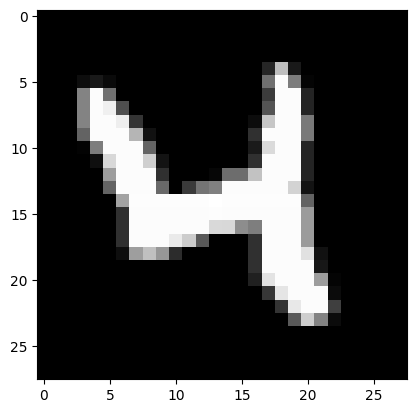

In [ ]:
import matplotlib.pyplot as plt
randomImage = trainDataset[20][0].numpy() * std_gray + mean_gray     #zero mean image , one is lable - the second value
plt.imshow(randomImage.reshape(28,28) , cmap = "gray")

In [ ]:
#moral of the story have multiple soruces of information time wasted one hour

In [ ]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = trainDataset , batch_size = batch_size , shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = testDataset , batch_size = batch_size , shuffle = False)

In [ ]:
print(len(train_loader))

600


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 1 , out_channels = 8 , kernel_size = 3  ,stride = 1 , padding = 1)
        #outputSize = 28 * 28 *8
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        #the outpue size = 28/ 2 = 14
        self.cnn2 = nn.Conv2d(in_channels = 8 , out_channels = 32 , kernel_size = 5 , stride = 1 , padding = 2)
        #output size = 32 f maps
        self.batchnorm2 = nn.BatchNorm2d(32)
        #flattening in here
        self.fc1 = nn.Linear(1568 , 600)
        #applying drop out layers
        self.dropout = nn.Dropout(p = 0.5)
        self.fc2 = nn.Linear(600, 10)

    def forward(self , X):
        out = self.cnn1(X)
        out = self.batchnorm1(out)
        out =self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out =  out.view(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [ ]:
from torch.autograd import Variable

# Move model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()

iteration = 0
correct_nodata = 0
correct_data = 0

for i, (inputs, labels) in enumerate(train_loader):
    if iteration == 1:
        break

    inputs = Variable(inputs)
    labels = Variable(labels)

    # Move inputs and labels to GPU if available
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()

    print("For one iteration, this is what happens:")
    print("Input Shape:", inputs.shape)
    print("Labels Shape:", labels.shape)

    # Forward pass
    output = model(inputs)  # Ensure model is on GPU

    print("Outputs Shape:", output.shape)

    # Predictions without `.data`
    _, predicted_nodata = torch.max(output, 1)
    print("Predicted Shape:", predicted_nodata.shape)
    print("Predicted Tensor:")
    print(predicted_nodata)

    correct_nodata += (predicted_nodata == labels).sum().item()
    print("Correct Predictions:", correct_nodata)

    # Predictions using `.data` (optional)
    _, predicted_data = torch.max(output.data, 1)
    correct_data += (predicted_data == labels.data).sum().item()
    print("Correct Predictions:", correct_data)

    iteration += 1


For one iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Outputs Shape: torch.Size([100, 10])
Predicted Shape: torch.Size([100])
Predicted Tensor:
tensor([2, 2, 2, 9, 6, 2, 9, 2, 5, 0, 2, 5, 2, 5, 3, 9, 2, 2, 2, 2, 5, 2, 5, 2,
        2, 5, 2, 5, 9, 9, 5, 9, 2, 5, 9, 5, 5, 5, 5, 3, 1, 7, 9, 5, 9, 5, 7, 2,
        9, 5, 2, 9, 9, 2, 9, 1, 9, 5, 4, 5, 2, 2, 5, 9, 2, 2, 9, 5, 2, 5, 5, 5,
        9, 9, 5, 2, 1, 5, 4, 5, 3, 5, 5, 2, 2, 9, 9, 9, 2, 5, 4, 5, 5, 2, 2, 2,
        3, 4, 5, 5], device='cuda:0')
Correct Predictions: 9
Correct Predictions: 9


In [ ]:
import torch

num_epochs = 10
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Move model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()
    loss_fn = loss_fn.cuda()  # Move loss function to GPU

for epoch in range(num_epochs):
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train()

    for i, (inputs, labels) in enumerate(train_loader):
        # Move data to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        iter_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)  # Get predicted class index
        correct += (predicted == labels).sum().item()  # Count correct predictions
        iterations += 1

    train_loss.append(iter_loss / iterations)
    train_accuracy.append(correct / len(trainDataset))

    # Testing phase
    loss = 0.0
    correct = 0
    iterations = 0

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # Disable gradient computation for inference
        for i, (inputs, labels) in enumerate(test_loader):
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            iter_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            iterations += 1

    test_loss.append(iter_loss / iterations)
    test_accuracy.append(correct / len(testDataset))

    print('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
          .format(epoch + 1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))


Epoch 1/10, Training Loss: 0.832, Training Accuracy: 0.755, Testing Loss: 5.108, Testing Acc: 0.967
Epoch 2/10, Training Loss: 0.311, Training Accuracy: 0.896, Testing Loss: 1.937, Testing Acc: 0.979
Epoch 3/10, Training Loss: 0.187, Training Accuracy: 0.942, Testing Loss: 1.166, Testing Acc: 0.986
Epoch 4/10, Training Loss: 0.128, Training Accuracy: 0.961, Testing Loss: 0.812, Testing Acc: 0.986
Epoch 5/10, Training Loss: 0.108, Training Accuracy: 0.969, Testing Loss: 0.685, Testing Acc: 0.990
Epoch 6/10, Training Loss: 0.093, Training Accuracy: 0.972, Testing Loss: 0.590, Testing Acc: 0.990
Epoch 7/10, Training Loss: 0.087, Training Accuracy: 0.975, Testing Loss: 0.560, Testing Acc: 0.990
Epoch 8/10, Training Loss: 0.081, Training Accuracy: 0.977, Testing Loss: 0.535, Testing Acc: 0.989
Epoch 9/10, Training Loss: 0.075, Training Accuracy: 0.978, Testing Loss: 0.494, Testing Acc: 0.989
Epoch 10/10, Training Loss: 0.068, Training Accuracy: 0.980, Testing Loss: 0.454, Testing Acc: 0.989

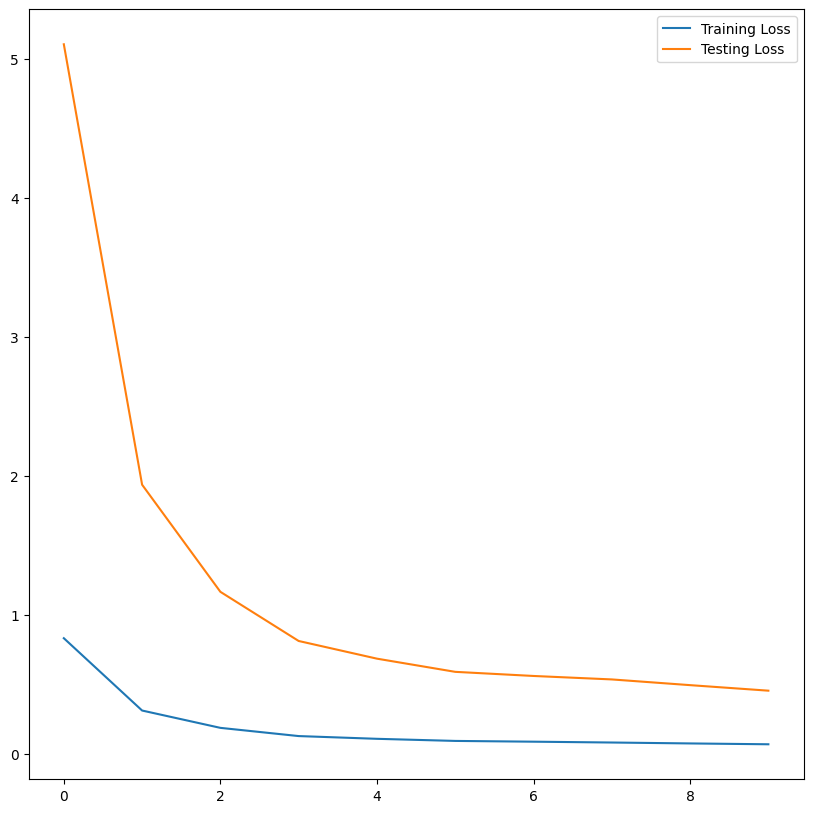

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.show()

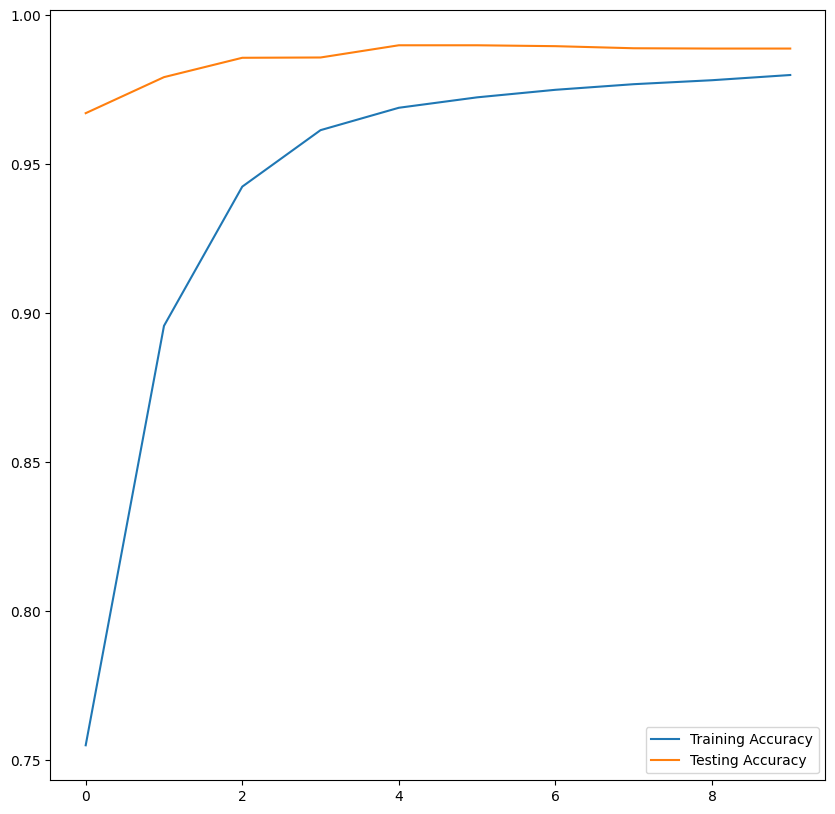

In [ ]:

# Accuracy
f = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
img = testDataset[300][0].unsqueeze(0)  # Add batch dimension (1,1,28,28)
label = testDataset[30][1]

if torch.cuda.is_available():
    model = model.cuda()
    img = img.cuda()

# Forward pass
outputs = model(img)

# Get predicted class
_, predicted = torch.max(outputs, 1)

print("Prediction is {}".format(predicted.item()))
print("Actual is : {}".format(label))


Prediction is 4
Actual is : 3
